# Домашнее задание

Всего у вас 2 домашних задания:

### 1) Бинарная классификация на примере детекции фрода на кредитных картах (6 баллов)
(в этом файле)

### 2) Небинарная классификация на вашем датасете (6 баллов)
(тоже в этом файле)

# 1 - Бинарная классификация на примере детекции фрода на кредитных картах (суммарно 6 баллов)
У вас есть информация о множесте транзакций. Вам нужно научиться предсказывать, какие из них мошеннические, а какие нет.

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve

### (1 балл) Считайте данные
Сами считайте и предобработайте, если надо, данные из файла creditcard.csv

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/My Drive/tinkoff/creditcard.csv')

X = data.drop(columns=['Class'])
y = data.Class

In [ ]:
data.shape

(284807, 31)

In [ ]:
data.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### (2 балла) Обучите несколько моделей, посмотрите на метрики.
Как модели точно возьмите LogisticRegression, KNN и константу, можете придумать еще какие-нибудь.

Как метрики точно возьмите accuracy, precision, recall, f1, roc_auc. Постройте ROC-кривую.

In [ ]:
def accuracy(y_real, y_pred):
  return np.where(y_pred == y_real)[0].shape[0] / y_real.shape[0]

def precision(y_real, y_pred):
    return np.where((y_pred == 1) & (y_real == 1))[0].shape[0] / np.where(y_pred == 1)[0].shape[0]

def recall(y_real, y_pred):
    return np.where((y_pred == 1) & (y_real == 1))[0].shape[0] / np.where(y_real == 1)[0].shape[0]

def f1(y_real, y_pred):
    return 2 * precision(y_real, y_pred) * recall(y_real, y_pred) / (precision(y_real, y_pred) + recall(y_real, y_pred))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
log_reg = LogisticRegression(max_iter=1000)
knn = KNeighborsClassifier()

log_reg.fit(X_train, y_train)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
y_pred_lr = log_reg.predict(X_test)
y_pred_knn = knn.predict(X_test)
y_pred_proba_lr = log_reg.predict_proba(X_test)
y_pred_proba_knn = knn.predict_proba(X_test)

In [ ]:
from collections import Counter
Counter(y_train)

Counter({0: 213226, 1: 379})

In [ ]:
y_pred_const = np.zeros(len(X_test))
y_pred_proba_const = np.zeros(len(X_test))

In [ ]:
print(accuracy(y_test, y_pred_lr))
print(accuracy(y_test, y_pred_knn))
print(accuracy(y_test, y_pred_const))
print()
print(precision(y_test, y_pred_lr))
print(precision(y_test, y_pred_knn))
#precision(y_test, y_pred_const)

print()
print(recall(y_test, y_pred_lr))
print(recall(y_test, y_pred_knn))
print(recall(y_test, y_pred_const))

print()
print(f1(y_test, y_pred_lr))
print(f1(y_test, y_pred_knn))
#print(f1(y_test, y_pred_const))

print()
print(roc_auc_score(y_test, y_pred_lr))
print(roc_auc_score(y_test, y_pred_knn))
print(roc_auc_score(y_test, y_pred_const))

0.9990590151962023
0.9985112777730962
0.9984129659279234

0.7948717948717948
1.0

0.5486725663716814
0.061946902654867256
0.0

0.6492146596858639
0.11666666666666665

0.7742237481944918
0.5309734513274337
0.5


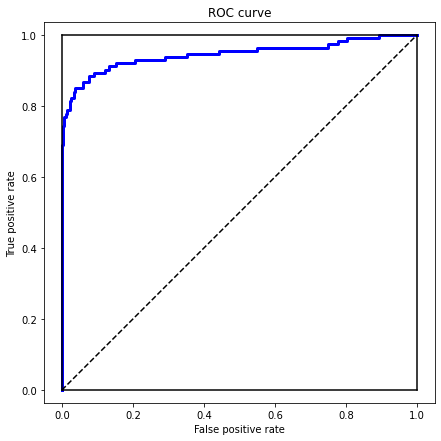

In [ ]:
plt.figure(figsize=(7, 7))
y_pred_proba_lr = y_pred_proba_lr[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_lr)
plt.plot(fpr, tpr, 'b', linewidth=3)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0, 0], [0, 1], 'k')
plt.plot([1, 1], [0, 1], 'k')
plt.plot([0, 1], [0, 0], 'k')
plt.plot([0, 1], [1, 1], 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.xlim((0, 1))
plt.ylim((0, 1))
plt.axis('equal')
plt.title('ROC curve')
plt.show()

### (1 балл) Выберите одну метрику, которую вы будете максимизировать

Представьте, что вы решаете задачу автоматического поиска мошеннических транзакций, чтобы ваш робот автоматически банил пользователей, который их осуществляют.

Обоснуйте свой выбор.

Так как мы хотим спасти все деньги мира, там нужно посмотреть на **recall (полнота)** - мы не сильно расстроимся, если паре честных людей задержим транзакцию, а вот если потеряем деньги на незамеченных мошеннеческих транзакциях - очень!

### (2 балла) Переберите гиперпараметры разных моделей, попытайтесь добиться лучшего результата по этой метрике

Постройте график для каждого перебора, сделайте красивый отчет (не надо просто говорить "я решил выбрать 2, 0.7 и 6, так не пойдет".

Можно преобразовывать датасет, преобразовывать, добавлять, удалять фичи, всё что угодно.

Отсутствие результата тоже результат (вдруг вы перебрали кучу вещей, а лучший все еще самый первый запуск, главное что перебрали).

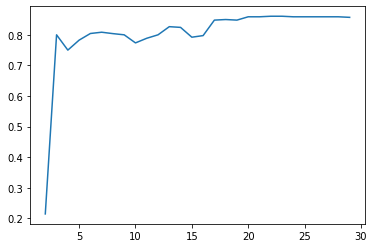

In [ ]:
num_col = np.arange(2, 30)
recalls = []
for i in num_col:
    X = data.iloc[:, np.arange(1, i)]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    log_reg = LogisticRegression()
    log_reg.fit(X_test, y_test)
    y_pred_lr = log_reg.predict(X_test)
    y_pred_proba_lr = log_reg.predict_proba(X_test)
    recalls.append(recall(y_pred_lr, y_test))

plt.plot(num_col, recalls)

исследуем KNN и соседей

In [ ]:
precisions = []
recalls = []
f1s = []

N_Neibhours = range(1, 11)
for i in N_Neibhours:
  knn_n = KNeighborsClassifier(n_neighbors=i)
  knn_n.fit(X_train, y_train)
  y_pred = knn_n.predict(X_test)
  cur_precision = precision(y_test, y_pred)
  precisions.append(cur_precision)
  cur_recall = recall(y_test, y_pred)
  recalls.append(cur_recall)
  f1s.append(f1(y_pred, y_test))




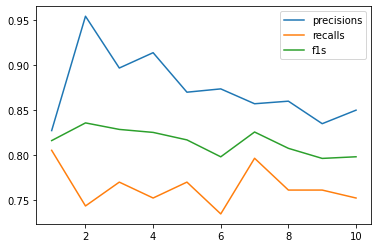

In [ ]:
plt.plot(N_Neibhours, precisions)
plt.plot(N_Neibhours, recalls)
plt.plot(N_Neibhours, f1s)
plt.legend(['precisions', 'recalls', 'f1s'])

а теперь Logistic Regression

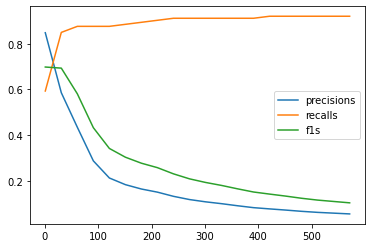

In [ ]:
precisions = []
recalls = []
f1s = []

weights = range(1, 600, 30)
for i in weights:
  log_reg_w = LogisticRegression(class_weight={0:1, 1:i}, max_iter=200)
  log_reg_w.fit(X_train, y_train)
  y_pred = log_reg_w.predict(X_test)
  cur_precision = precision(y_test, y_pred)
  precisions.append(cur_precision)
  cur_recall = recall(y_test, y_pred)
  recalls.append(cur_recall)
  f1s.append(f1(y_test, y_pred))


plt.plot(weights, precisions)
plt.plot(weights, recalls)
plt.plot(weights, f1s)
plt.legend(['precisions', 'recalls', 'f1s'])

Посмотрев внимательно на графики, я выявила, что 
*   выкидывать столбцы не классно 
*   для KNN хорошо бы взять 7 соседей
*   для LogReg круто бы взять вес, сильно больший 1 (например, 600)




Тут на самом деле стоило бы учесть, что трудочасы на проверку тоже стоят денег, но я иду из идеии "спасаем все деньги мира", поэтому работаю с recall

# 2 - Небинарная классификация на вашем датасете (суммарно 6 баллов)

### (2 балла) Выберите какой-нибудь интересный вам датасет, скачайте его и считайте данные

Творческое задание - найти в интернете (или собрать свой даже) датасет, сохранить его в файл, и загрузить сюда.

Требования:

- он должен быть немаленький (хотя бы 500 объектов, лучше больше)
- он должен быть интересный
- таргет должен быть небинарным классом

Минус балл, если ваш датасет с кем-нибудь повторится.

Я выбрала [датасет](https://www.kaggle.com/ronitf/heart-disease-uci), который как-то характеризует **заболевания сердца**. Я буду работать с колонкой chest pain (4 типа)

Он мне очень нравится, потому что мне в целом нравится биология. Поэтому среди классификаций вина и цен на мобильные приложения, будет и биология

Да, я видела, что в нем не 500, а 303 объекта, но мне очень понравилась сама тема этого датасета и я не смогла от него отказаться.

In [ ]:
data = pd.read_csv('/content/drive/My Drive/tinkoff/heart.csv')

X = data.drop(columns=['cp'])
y = data.cp

In [ ]:
X.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,120,354,0,1,163,1,0.6,2,0,2,1


### (2 балла) Обучите несколько моделей, посмотрите на метрики.
Как модели точно возьмите LogisticRegression, KNN и константу, можете придумать еще какие-нибудь.

Как метрики точно возьмите accuracy, разные усреднения precision, recall и f1.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_train, y_train)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
y_pred_log_reg = log_reg.predict(X_test)
y_pred_knn = knn.predict(X_test)
y_pred_const = np.zeros(X_test.shape[0])
y_pred_proba_log_reg = log_reg.predict_proba(X_test)
y_pred_proba_knn = knn.predict_proba(X_test)
y_pred_proba_const = np.full([1, 0, 0, 0], X_test.shape[0])

In [ ]:
from collections import Counter

c = Counter(y)
c

Counter({0: 143, 1: 50, 2: 87, 3: 23})

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

print(accuracy_score(y_test, y_pred_log_reg))
print(accuracy_score(y_test, y_pred_knn))
print(accuracy_score(y_test, y_pred_const))
print()
print(precision_score(y_test, y_pred_log_reg, average = 'macro'))
print(precision_score(y_test, y_pred_knn, average = 'macro'))


print()
print(recall_score(y_test, y_pred_log_reg, average = 'macro'))
print(recall_score(y_test, y_pred_knn, average= 'macro'))
print(recall_score(y_test, y_pred_const, average='macro'))

print()
print(f1_score(y_test, y_pred_log_reg, average= 'macro'))
print(f1_score(y_test, y_pred_knn, average = 'macro'))




0.5901639344262295
0.5081967213114754
0.5409836065573771

0.3399407609933926
0.3086080586080586

0.3745143745143745
0.33352758352758355
0.25

0.35274621212121215
0.31845238095238093


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



### (2 балла) Выберите метрику, которую вы хотите максимизировать. Переберите гиперпараметры, постарайтесь найти модель, которая максимизирует эту метрику.

Обоснуйте свой выбор. Напишите красивый отчет с графиками. Добились ли вы результатов, которых хотели добиться для этого датасета?

Кажется, я хочу максимизировать F1: врачам сложно, их мало, пациентов много и хоть немного помощи не помешало бы, но нам важна как точность, так и полнота, потому что врачам нет смысла как от "одного из 100 правильных диагнозах", так и о "ста каких-то, среди которых правильны пару штук".

In [ ]:
data.shape

(303, 14)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


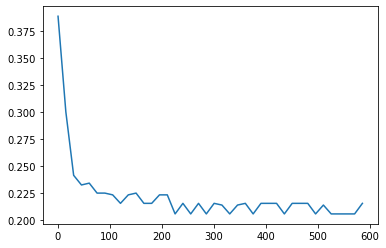

In [ ]:

f1s = []

weights = range(1, 600, 15)
for i in weights:
  log_reg_w = LogisticRegression(class_weight={0:1, 1:i}, max_iter=1000)
  log_reg_w.fit(X_train, y_train)
  y_pred = log_reg_w.predict(X_test)
  f1s.append(f1_score(y_test, y_pred, average = 'macro'))


plt.plot(weights, f1s)


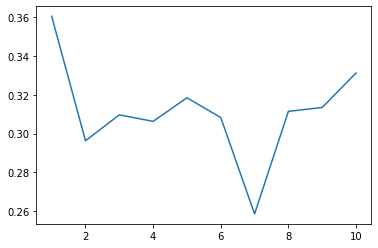

In [ ]:

f1s = []

N_Neibhours = range(1, 11)
for i in N_Neibhours:
  knn_n = KNeighborsClassifier(n_neighbors=i)
  knn_n.fit(X_train, y_train)
  y_pred = knn_n.predict(X_test)
  cur_precision = precision(y_test, y_pred)
  precisions.append(cur_precision)
  cur_recall = recall(y_test, y_pred)
  recalls.append(cur_recall)
  f1s.append(f1_score(y_pred, y_test, average = 'macro'))
plt.plot(N_Neibhours, f1s)

В общем, дальше чем 32-33% на F1 уйти у меня не получилось. 
Почему?

*Потому*, что врачи есть, чтобы лечить и, видимо, мы в этом не можем помочь.

Вот, такие дела.

(я, конечно же, не исключаю, что у меня просто лапки)


Но для KNN круче взять 1 соседа (самый похожий случай)
Для log reg веса все портят, поэтому просто не надо там ничего трогать. (работает и ладно называется)

А вообще тут лучше бы GridSearch подошел
